In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Salary.csv')

In [4]:
df

,"rank""",discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank"', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['rank"']=le.fit_transform(df['rank"'])
df['discipline']=le.fit_transform(df["discipline"])
df

,"rank""",discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [7]:
df.isnull().sum()

rank"            0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:xlabel='rank"', ylabel='salary'>

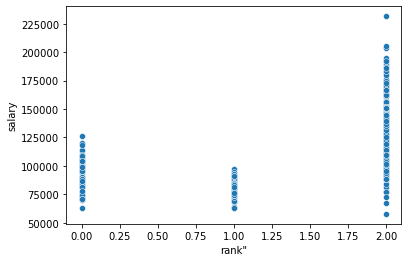

In [8]:
import seaborn as sns
sns.scatterplot(x='rank"',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

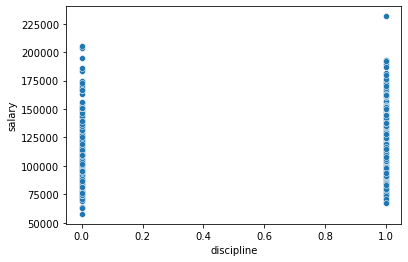

In [9]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

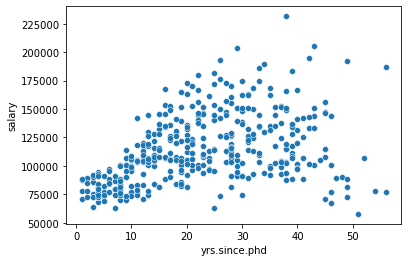

In [10]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

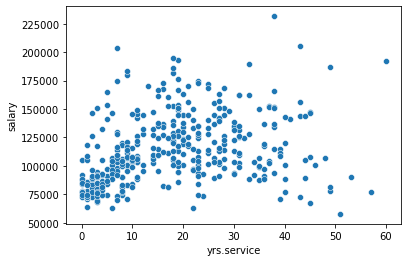

In [11]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

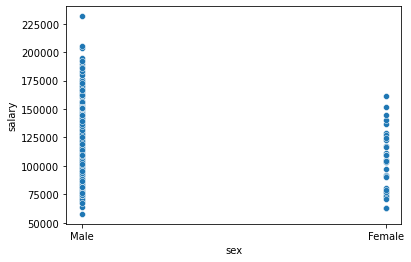

In [12]:
sns.scatterplot(x='sex',y='salary',data=df)

In [13]:
df.corr()

,"rank""",discipline,yrs.since.phd,yrs.service,salary
"rank""",1.000000,-0.086266,0.525500,0.447499,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.334745
salary,0.522207,0.156084,0.419231,0.334745,1.000000


In [14]:
df.corr()['salary'].sort_values()

discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank"            0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

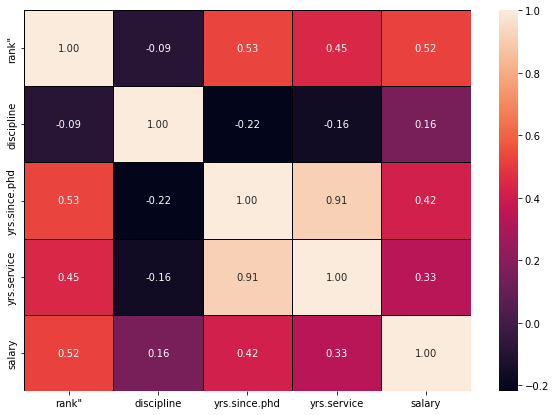

In [15]:
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

In [16]:
df.describe()

,"rank""",discipline,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,113706.458438
std,0.757486,0.498682,12.887003,13.006024,30289.038695
min,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,231545.000000


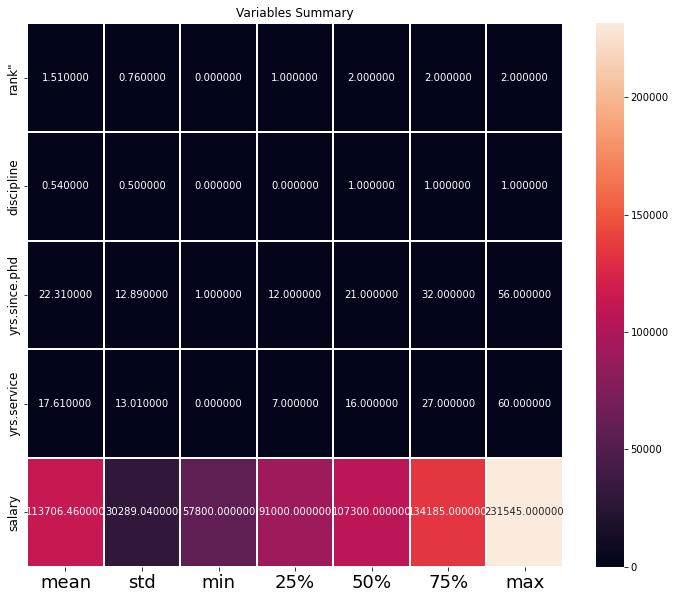

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank"          397 non-null    int32 
 1   discipline     397 non-null    int32 
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int32(2), int64(3), object(1)
memory usage: 15.6+ KB


In [19]:

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='rank"'>

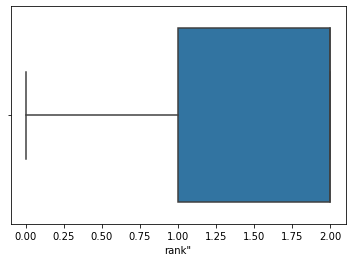

In [20]:
sns.boxplot(df['rank"'])

rank"               AxesSubplot(0.125,0.125;0.133621x0.755)
discipline       AxesSubplot(0.285345,0.125;0.133621x0.755)
yrs.since.phd     AxesSubplot(0.44569,0.125;0.133621x0.755)
yrs.service      AxesSubplot(0.606034,0.125;0.133621x0.755)
salary           AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

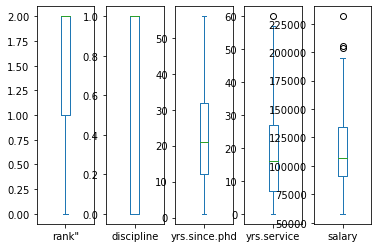

In [21]:
df.plot(kind='box',subplots=True)

<AxesSubplot:xlabel='rank"', ylabel='Density'>

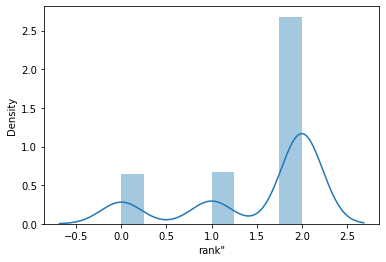

In [22]:
sns.distplot(df['rank"'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

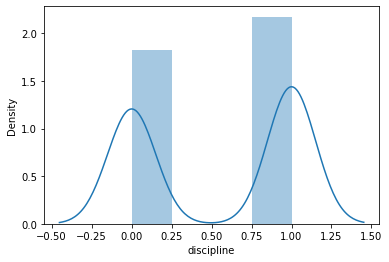

In [23]:
sns.distplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

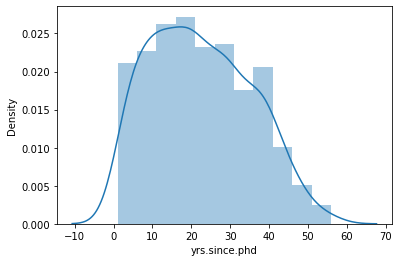

In [24]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

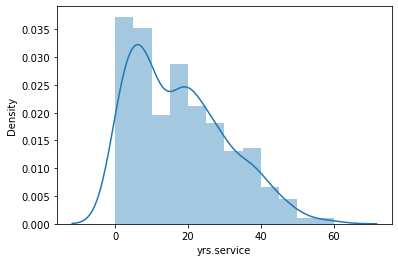

In [25]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

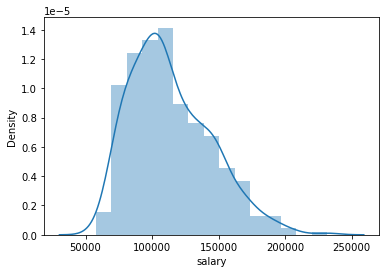

In [26]:
sns.distplot(df['salary'])

In [27]:
df

,"rank""",discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [28]:
df.drop(['sex'],axis=1,inplace=True)

In [29]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 5)

In [30]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [31]:
len(np.where(z>3)[0])

4

In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
df_new

,"rank""",discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [34]:
df=df_new

In [35]:
df.shape

(393, 5)

In [36]:
x=df.iloc[:,0:-1]
x.shape

(393, 4)

In [37]:
y=df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [46]:
x_train.shape

(263, 4)

In [47]:
y_train.shape

(263,)

In [48]:
x_test.shape

(130, 4)

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.intercept_)
print(lr.coef_)

0.39802378268376015
65462.39529765211
[13394.6925771  15772.07131819  1407.31093126  -715.33951643]


In [51]:
pred=lr.predict(x_test)
print("predicted result price",pred)
print('actual price',y_test)
print('error')
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean Squared error",mean_squared_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

predicted result price [131022.48517052  79418.66410219 129778.75095051 115825.54475912
 129732.01474729 128020.91849515 149247.42297204 113702.89431143
 140873.66168932 116082.59387679 116564.25237716 126155.31716513
 110872.3969453   89376.86770677 134987.36884662 120879.65757735
 130517.45856855 131504.14367088 121863.28006654 103681.33721114
 104707.2659187   98112.38436867 132289.58749214 113749.63051464
 143548.07494219  83747.62398174  75220.09941003  99555.93943694
 117279.59189359 132958.19080535 103049.65667888 107521.88778121
 104847.47452834 117279.59189359  92399.48165948  87254.21725908
  98112.38436867  96705.07343742  85846.90632782 124102.77102227
 145764.19779631 119977.37324807 117042.84826437  73144.18516555
  94381.92349752 148508.715354   129545.06993444 105539.44594316
 100893.14606338  74504.75989359 112482.52819302  85893.64253103
  97397.04485224 119954.00514646  80227.47602505 130450.41687687
 131186.06188176 122555.25148137 143454.60253577 121311.51726136
 1

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print("predicted result price",preddtc)
print('actual price',y_test)
print('error')
print("mean absolute error",mean_absolute_error(y_test,preddtc))
print("mean Squared error",mean_squared_error(y_test,preddtc))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,preddtc)))
from sklearn.metrics import r2_score
print(r2_score(y_test,preddtc))

0.9558428233307876
predicted result price [126200.          81500.          96545.         113278.
 111168.          91412.         106689.         122875.
 128464.         120806.          91100.         104800.
 105350.          74100.         119700.          94350.
 150480.         152179.         163200.          98510.
 105668.          87414.5        189409.         139219.
 142023.          69200.          82099.          81800.
  91100.          99418.          79858.         122400.
 105260.          91100.         109650.          74000.
  87414.5         75243.          77081.         128400.
 106689.          87800.         112865.5         88650.
  95611.         133700.         126933.         108100.
  81800.          82099.         140300.          78750.
  92350.         136500.         108413.          88709.
  96545.         170000.         147310.5        117256.
 148500.         134885.          80225.          77000.
 112429.         144651.         132825.      